# Rotação 3D


Vamos usar o método dos **Eixo/Ângulo** onde temos um eixo de rotação $\hat{n}$ e um ângulo $\theta$.

Usando um vetor 3D, podemos representar a rotação como: $w = \theta \cdot \hat{n}$


Os passos para obter uma rotação são os seguintes:

1 - Projetar o nosso vetor, $\vec{v}$, no nosso eixo de rotação (sendo que este vetor projetado não é influenciado pela rotação):

$\vec{v_{||}} = \hat{n} (\hat{n} \cdot \vec{v}^T) = (\hat{n}\hat{n}^T)\vec{v}$

2 - Agora obtemos o vetor residual entre $\vec{v}$ e o $\vec{v_{||}}$, sendo este vetor perpendicular a $\vec{v_{||}}$:

$\vec{v_{\perp}} = \vec{v} - \vec{v_{||}} = (I - \hat{n}\hat{n}^T)\vec{v}$

3 - Criamos a matriz que representa o operador $\hat{n}$ num produto vetorial:

$[\hat{n}]_{\times} = \begin{bmatrix} 0 & -\hat{n}_z & \hat{n}_y \\ \hat{n}_z & 0 & -\hat{n}_x \\ -\hat{n}_y & \hat{n}_x & 0 \end{bmatrix}$

4 - Calculamos a rotação de 90 e 180 graus:

$\vec{v}_{\times} = [\hat{n}]_{\times} \cdot \vec{v} \Leftrightarrow \hat{n} \times \vec{v}$ -> 90 graus

$\vec{v}_{\times\times} = [\hat{n}]_{\times}^2 \cdot \vec{v} = -\vec{v}_{\perp}$ -> 180 graus

5 - Calculamos o vetor rotacionado, mas ainda assente no plano:

$\vec{u}_{\perp} = \cos{\theta} \vec{v}_{\perp} + \sin{\theta} \vec{v}_{\times} = (\sin{\theta}[\hat{n}]_{\times} - \cos{\theta}[\hat{n}]_{\times}^2) \cdot \vec{v}$


6 - Sabemos também que:

$\vec{v_{||}} = \vec{v} - \vec{v}_{\perp} = \vec{v} + \vec{v}_{\times\times} = (I + [\hat{n}]_{\times}^2) \cdot \vec{v}$


7 - Obtemos o vetor final rotacionado:


$\vec{u} = \vec{u}_{\perp} + \vec{v}_{||}$

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def plot(*args):
    """ Plota múltiplos vetores no espaço 3D """
    ax = plt.axes(projection='3d')
    ax.set_xlim([-2, 3])
    ax.set_ylim([-2, 3])
    ax.set_zlim([-2, 3])

    for c, vec in args:
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=c)


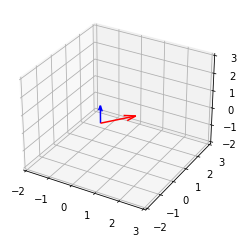

In [90]:
# Nosso v
v = np.array([1.5, 0, 1])

# Eixo de rotação
axis_vec = np.array([0, 0, 1])

# Ângulo em radianos
theta = np.deg2rad(20)

# Plotar vetores
plot(("r", v), ("b", axis_vec))

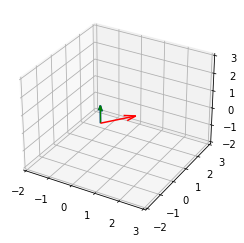

In [91]:
# v projetado em axis_vec
v_proj = axis_vec * (axis_vec @ v)
#v_proj = axis_vec * axis_vec.T * v

plot(("r", v), ("b", axis_vec), ("g", v_proj))

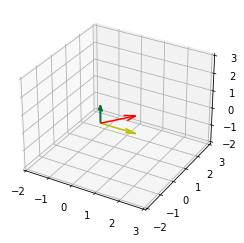

In [92]:
# Resiudal entre v e v_proj

v_perp = v - v_proj
#v_perp = (np.identity(3) - axis_vec * axis_vec.T) * v

plot(("r", v), ("b", axis_vec), ("g", v_proj), ("y", v_perp))

In [93]:
# Operador axis_vec no produto vetorial, representado matricialmente
axis_vec_cross = np.array([
    [0, -axis_vec[2], axis_vec[1]],
    [axis_vec[2], 0, -axis_vec[0]],
    [-axis_vec[1], axis_vec[0], 0]
])
axis_vec_cross

array([[ 0, -1,  0],
       [ 1,  0,  0],
       [ 0,  0,  0]])

In [94]:
# Rotacionar v 90 graus em relação ao axis_vec
v_x = axis_vec_cross @ v

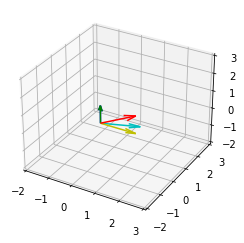

In [95]:
# Calcular vetor rotacionado no plano
u_perp = np.cos(theta) * v_perp + np.sin(theta) * v_x
#u_perp = ( np.sin(theta) * axis_vec_cross - np.cos(theta) * axis_vec_cross**2 ) * v

plot(("r", v), ("b", axis_vec), ("g", v_proj), ("y", v_perp), ("c", u_perp))

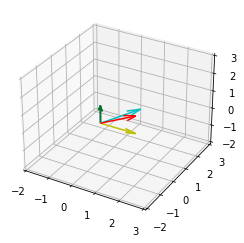

In [96]:
# Calcular vetor rotacionado final
u = u_perp + v_proj

plot(("r", v), ("b", axis_vec), ("g", v_proj), ("y", v_perp), ("c", u))

In [97]:
u

array([1.40953893, 0.51303021, 1.        ])

Este passo a passo permitiu-nos deduzir uma expressão completa que permite criar uma matriz de rotação 3D, porém só funciona para pequenas rotações, como esta feita acima (nos meus testes a partir de 90 graus começam a obter resultados totalmente diferentes).

Chama-se ***Fórmula de Rodriguez*** e permite-nos criar a seguinte matriz de transformação: 

$R(\hat{n}, \theta) = I + \sin{\theta} \cdot [\hat{n}]_{\times} + (1 - \cos{\theta}) \cdot [\hat{n}]_{\times}^2$

In [98]:
R = np.identity(3) + np.sin(theta) * axis_vec_cross + (1 - np.cos(theta) ) * axis_vec_cross ** 2

R @ v

array([1.5       , 0.60349128, 1.        ])

Ela tem uma simplificação que continua a funcionar, apesar de haver mais imprecisões:


$R(\hat{n}, \theta) = I + \sin{\theta} \cdot [\hat{n}]_{\times}$

In [99]:
# Rodriguez's Formula simplified
R = (np.identity(3) + np.sin(theta) * axis_vec_cross) 

R @ v

array([1.5       , 0.51303021, 1.        ])

Esta fórmula deriva de algo chamado ***Exponential Twist***:

$R(\hat{n}, \theta) = \lim_{k \to \infty} (I + \frac{1}{k}[\theta \hat{n}]_{\times})^k$

Que pode ser extendida para um série de Taylor, resultando na ***Fórmula de Rodriguez***

Todo o procedimento (sem a fórmula, **Eixo/Ângulo**) permite obter uma rotação 3D, PORÉM nem sempre são únicas essas rotações, já que, por exemplo, a rotação de 90 graus é a mesma que 360+90 graus.

Se quisermos ter representações únicas para cada rotação, esta não é uma boa escolha. 

No entanto para pequenas rotações fica até mais fácil usar a matriz $R$ calculada pela fórmula de Rodriguez.